In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import subprocess
%matplotlib inline

# 興奮前面・興奮後面の可視化

In [2]:
out_dir = '/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171025'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

dir_name:20171014-40
output figures:start
dir_name:20171014-42
output figures:start
dir_name:20171014-46
output figures:start
dir_name:20171014-4
output figures:start


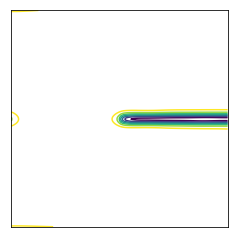

In [28]:
dir_names = ['20171014-40', '20171014-42', '20171014-46', '20171014-4']
width = 10

for dir_name in dir_names:
    print('dir_name:%s'%dir_name)
    time = 1000
    hj_array = np.zeros((time+1, 200, 200))
    m_array = np.zeros((time+1, 200, 200))
    Ina = np.zeros((time+1, 200, 200))
    for i in range(time):
        num = '{0:04d}'.format(i)
        a = np.load('/mnt/recordings/SimulationResults/%s/cell_%s/%s' % (dir_name, num, 'h.npy')).reshape((200, 200))
        b = np.load('/mnt/recordings/SimulationResults/%s/cell_%s/%s' % (dir_name, num, 'j.npy')).reshape((200, 200))
        hj_array[i, :, :] = a*b
        m_array[i, :, :] = np.load('/mnt/recordings/SimulationResults/%s/cell_%s/%s' % (dir_name, num, 'm.npy')).reshape((200, 200))
        Ina[i, :, :] = np.load('/mnt/recordings/SimulationResults/%s/cell_%s/%s' % (dir_name, num, 'xina.npy')).reshape((200, 200))
        
    x = np.arange(200)
    y = np.arange(200)
    X, Y = np.meshgrid(x, y)

    if not os.path.exists(os.path.join(out_dir, dir_name, 'contour')):
        os.makedirs(os.path.join(out_dir, dir_name, 'contour'))

    print('output figures:start')
    for i in range(time):
        if i < width+1:
            continue

        plt.clf()

        im_out = np.ones([200, 200, 3], dtype=np.uint8)*255
        im_out[:, :, 0] = 255
        im_out[:, :, 1] = (1-(np.sum((Ina[i-width:i, :, :] < -1), axis=0) > 0))*255
        im_out[:, :, 2] = (1-(np.sum((Ina[i-width:i, :, :] < -1), axis=0) > 0))*255

        Z = hj_array[i,:,:] 
        #Z = Z[::-1, :]

        plt.contour(X, Y, Z)
        plt.imshow(im_out)
        plt.xticks([])
        plt.yticks([])
        plt.gca().set_aspect('equal')
        plt.savefig(os.path.join(out_dir, dir_name, 'contour/contour_{0:0>6}.png'.format(i-width-1)), dpi=300, transparent=True)

# 温度分布再出力

In [33]:
x = np.arange(0, 200, 1.0)

omega = 3.0
mean = 100.0
y = np.exp((-(x-mean)*(x-mean))/(2*omega*omega))/np.sqrt(2*np.pi*omega*omega)
y = 310 - y/np.max(y) * 8

data = np.ones([200, 200])*310

for i in range(100):
    data[i, :] = y
plt.imshow(data, cmap='jet')
plt.xticks([])
plt.yticks([])
plt.savefig('/mnt/recordings/AnalysisResult/Seno/simulation/Mahajan/20171025/cooling_id42.png', dpi=300, transparent=True)
plt.close()